<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Intro to `pandas` Lab

___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### A. Explore _Mad Men_ Cast Data

---

#### 1. Load the _Mad Men_ cast data into a `pandas` DataFrame.

In [2]:
cast_data_csv = '../../../../../resource-datasets/mad_men_actors/mad-men-cast-show-data.csv'

In [3]:
cast = pd.read_csv(cast_data_csv, encoding='latin-1')

#### 2. Print the head and tail of the data.

In [4]:
cast.head(2)

,Performer,Show,Show Start,Show End,Status?,CharEnd,Years Since,#LEAD,#SUPPORT,#Shows,Score,Score/Y,lead_notes,support_notes,show_notes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,0,0,0,0.00,0,NaN,NaN,NaN
1,Kelli Williams,The Practice,1997,2014,END,2003,12,0,1,6,6.25,0.520833333,NaN,Any Day Now (2012),"Medical Investigation, Season 1; Lie To Me, Se..."


In [5]:
cast.tail(2)

,Performer,Show,Show Start,Show End,Status?,CharEnd,Years Since,#LEAD,#SUPPORT,#Shows,Score,Score/Y,lead_notes,support_notes,show_notes
246,Patrick Dempsey,Grey's Anatomy,2005,PRESENT,LEFT,2015,0,0,0,0,0.0,#DIV/0!,NaN,NaN,NaN
247,Ian McElhinney,Game of Thrones,2011,PRESENT,LEFT,2015,0,0,0,0,0.0,#DIV/0!,NaN,NaN,NaN


#### 3. Print the columns of the data.

In [6]:
cast.columns

Index(['Performer', 'Show', 'Show Start', 'Show End', 'Status?', 'CharEnd',
       'Years Since', '#LEAD', '#SUPPORT', '#Shows', 'Score', 'Score/Y',
       'lead_notes', 'support_notes', 'show_notes'],
      dtype='object')

#### 4. Rename the columns in such a way that no spaces or special symbols are contained.

Hint: Special symbols or spaces are not contained in the uppercase or lowercase letters.

In [7]:
import string
# the string library has default strings that contain all letters or numbers
uppercase = string.ascii_uppercase
lowercase = string.ascii_lowercase
letters = uppercase+lowercase

In [8]:
new_columns = []
for col in cast.columns:
    new_name = ''
    for letter in col:
        if letter in letters:
            new_name += letter
    new_columns.append(new_name)
new_columns

['Performer',
 'Show',
 'ShowStart',
 'ShowEnd',
 'Status',
 'CharEnd',
 'YearsSince',
 'LEAD',
 'SUPPORT',
 'Shows',
 'Score',
 'ScoreY',
 'leadnotes',
 'supportnotes',
 'shownotes']

In [9]:
cast.columns = [('').join([letter for letter in col if letter in letters]) 
                for col in cast.columns]
cast.columns

Index(['Performer', 'Show', 'ShowStart', 'ShowEnd', 'Status', 'CharEnd',
       'YearsSince', 'LEAD', 'SUPPORT', 'Shows', 'Score', 'ScoreY',
       'leadnotes', 'supportnotes', 'shownotes'],
      dtype='object')

#### 5. Subset the data where the status of the show is not "END" or "End".

In [10]:
cast.head(2)

,Performer,Show,ShowStart,ShowEnd,Status,CharEnd,YearsSince,LEAD,SUPPORT,Shows,Score,ScoreY,leadnotes,supportnotes,shownotes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,0,0,0,0.00,0,NaN,NaN,NaN
1,Kelli Williams,The Practice,1997,2014,END,2003,12,0,1,6,6.25,0.520833333,NaN,Any Day Now (2012),"Medical Investigation, Season 1; Lie To Me, Se..."


In [31]:
cast[(cast['Status'] != 'END') & (cast['Status'] != 'End')].head()

,Performer,Show,ShowStart,ShowEnd,Status,CharEnd,YearsSince,LEAD,SUPPORT,Shows,Score,ScoreY,leadnotes,supportnotes,shownotes
157,Siobhan Finneran,Downton Abbey,2010,PRESENT,LEFT,2012,3,0,0,8,8.0,2.666666667,NaN,NaN,"The Syndicate, Season 2; Happy Valley, Season ..."
162,Eric Dane,Grey's Anatomy,2005,PRESENT,LEFT,2012,3,0,0,1,1.0,0.333333333,NaN,NaN,"The Last Ship, Season 1"
163,David Harewood,Homeland,2011,PRESENT,LEFT,2012,3,0,0,1,1.0,0.333333333,NaN,NaN,"Selfie, Season 1"
171,Dan Stevens,Downton Abbey,2010,PRESENT,LEFT,2012,3,3,4,0,4.0,1.333333333,"Summer in February, 2014; The Guest, 2014; Nig...","Vamps, 2012; The Fifth Estate, 2013; A Walk Am...",NaN
173,Michelle Fairley,Game of Thrones,2011,PRESENT,LEFT,2013,2,0,2,3,3.5,1.75,NaN,"Ironclad: Battle for Blood, 2014; Jack et la m...","Suits, Season 3; 24: Live Another Day, Season ..."


In [33]:
# alternative formulation through a mask (a variable containing the condition)
mask = (cast['Status'] != 'END') & (cast['Status'] != 'End')
subset = cast[mask]
subset.shape

(29, 15)

In [13]:
# alternative formulation asking for string alternatives
cast[~cast.Status.isin(['End','END'])].shape

(29, 15)

#### 6. Print out the performers where the show start is greater than 2005 and the score is greater than 7.

In [14]:
# double checking out dtypes to make sure they are correct.
cast.dtypes

Performer        object
Show             object
ShowStart         int64
ShowEnd          object
Status           object
CharEnd           int64
YearsSince        int64
LEAD              int64
SUPPORT           int64
Shows             int64
Score           float64
ScoreY           object
leadnotes        object
supportnotes     object
shownotes        object
dtype: object

In [90]:
cast[(cast['ShowStart'] > 2005) & (cast['Score'] > 7)].Performer.unique()

array(['Scott Porter', 'Connie Britton', 'Amanda Seyfried',
       'Siobhan Finneran'], dtype=object)

In [50]:
mask = (cast['ShowStart'] < 1995) & (cast['Performer'] == 'Steven Hill')

In [51]:
cast[mask]

,Performer,Show,ShowStart,ShowEnd,Status,CharEnd,YearsSince,LEAD,SUPPORT,Shows,Score,ScoreY,leadnotes,supportnotes,shownotes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,0,0,0,0.0,0,NaN,NaN,NaN


#### 7. Select the `performer` and `show` columns for the 20th-25th LABELED rows.

In [16]:
cast.loc[20:25, ['Show', 'Performer']]

,Show,Performer
20,Joan of Arcadia,Mary Steenburgen
21,Six Feet Under,Mathew St. Patrick
22,Joan of Arcadia,Michael Welch
23,Joan of Arcadia,Aaron Himelstein
24,Joan of Arcadia,Becky Wahlstrom
25,Joan of Arcadia,Chris Marquette


In [53]:
cast.iloc[20:25,4:6]

,Status,CharEnd
20,END,2005
21,END,2005
22,END,2005
23,END,2005
24,END,2005


#### 8. Plot a histogram of score.

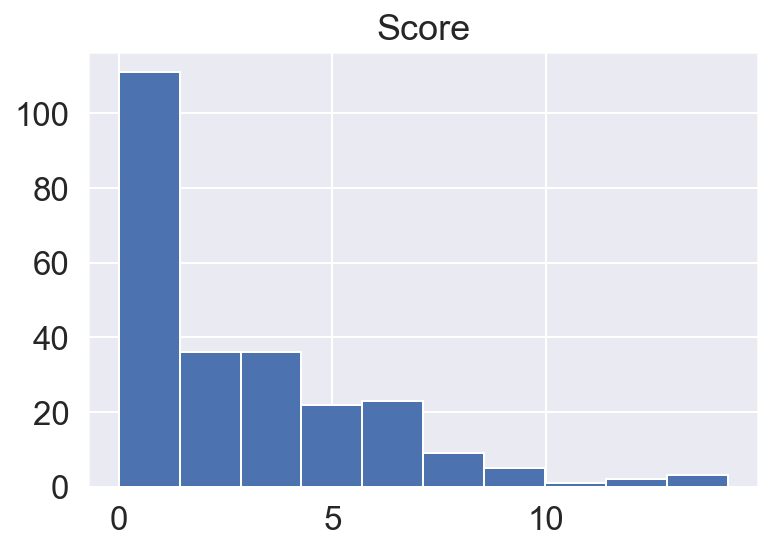

In [58]:
cast[['Score']].hist()
plt.show()

### B. Explore San Francisco Crime Data

--- 

**9. Load the San Francisco crime data set into a DataFrame.**

In [63]:
crime_csv = '../../../../../resource-datasets/sf_crime/sf_crime_sample.csv'

In [64]:
crime = pd.read_csv(crime_csv)

**10. Look at the dimensions of the crime data.**

In [65]:
crime.shape

(25000, 9)

**11. Look at the data types of the columns and print out the column names.**

In [66]:
crime.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [67]:
crime.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [71]:
crime.head(3)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2003-03-23 23:27:00,ARSON,ARSON OF A VEHICLE,Sunday,BAYVIEW,NONE,0 Block of HUNTERS PT EXPWY EX,-122.376945,37.733018
1,2006-03-07 06:45:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,0 Block of MARINA BL,-122.432952,37.805052
2,2004-03-06 03:00:00,NON-CRIMINAL,LOST PROPERTY,Saturday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421


**12. How many distinct districts are there?**

Hint: You can use the command `.unique()` on any pandas series.

In [69]:
print(crime.PdDistrict.unique())
print(len(crime.PdDistrict.unique()))

['BAYVIEW' 'NORTHERN' 'SOUTHERN' 'TARAVAL' 'MISSION' 'INGLESIDE' 'CENTRAL'
 'TENDERLOIN' 'RICHMOND' 'PARK']
10


In [72]:
crime.DayOfWeek.unique()

array(['Sunday', 'Tuesday', 'Saturday', 'Friday', 'Monday', 'Wednesday',
       'Thursday'], dtype=object)

**13. Which day of the week has the most crime?**

In [84]:
for day in crime.DayOfWeek.unique():
    print(day, crime[crime.DayOfWeek == day].shape[0])

Sunday 3313
Tuesday 3548
Saturday 3496
Friday 3883
Monday 3524
Wednesday 3657
Thursday 3579


In [86]:
for day in crime.DayOfWeek.unique():
    print(day, crime[crime.DayOfWeek == day].shape[0])

Sunday 3313
Tuesday 3548
Saturday 3496
Friday 3883
Monday 3524
Wednesday 3657
Thursday 3579


In [87]:
ddd=[crime[crime.DayOfWeek == day].shape[0] for day in crime.DayOfWeek.unique()]

In [89]:
print(pd.DataFrame(ddd))

      0
0  3313
1  3548
2  3496
3  3883
4  3524
5  3657
6  3579


In [25]:
# Friday has the most crime.

#### 14. Make a new DataFrame featuring the crime categories and the number of crimes per category.

In [26]:
categories = crime.Category.unique()
counts = [crime[crime['Category'] == cat].shape[0] for cat in categories]
categories = pd.DataFrame({'crime_category': categories, 'crimes': counts})
print(categories.head())

   crime_category  crimes
0           ARSON      52
1   LARCENY/THEFT    4934
2    NON-CRIMINAL    2601
3        BURGLARY    1023
4  SUSPICIOUS OCC     891


**15. Make a DataFrame that includes the districts and crime counts per district. Which district has the most crime?**

*Hint: You can use the `.sort_values()` function to sort your DataFrame by column.*

In [27]:
districts = crime.PdDistrict.unique()
counts = [crime[crime['PdDistrict'] == district].shape[0]
          for district in districts]
districts = pd.DataFrame({'district': districts, 'crimes': counts})
print(districts.head())

   district  crimes
0   BAYVIEW    2555
1  NORTHERN    3076
2  SOUTHERN    4413
3   TARAVAL    1804
4   MISSION    3416


In [28]:
districts.sort_values('crimes', ascending=False).head()

,district,crimes
2,SOUTHERN,4413
4,MISSION,3416
1,NORTHERN,3076
0,BAYVIEW,2555
6,CENTRAL,2424


In [29]:
pd.DataFrame(crime.PdDistrict.value_counts())

,PdDistrict
SOUTHERN,4413
MISSION,3416
NORTHERN,3076
BAYVIEW,2555
CENTRAL,2424
TENDERLOIN,2336
INGLESIDE,2256
TARAVAL,1804
PARK,1438
RICHMOND,1282
